# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import load_dataset
import numpy as np
import statsmodels.formula.api as smf

In [21]:
# Dados da gorjeta e seu tratamento:
tips = sns.load_dataset("tips")
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Exibe os dados

tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [23]:
# Criando as variáveis
X = tips['net_bill']
y = tips['tip']

# Regressão linear
reg = smf.ols('tip ~ net_bill', data=tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.02e-23
Time:                        18:27:04   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

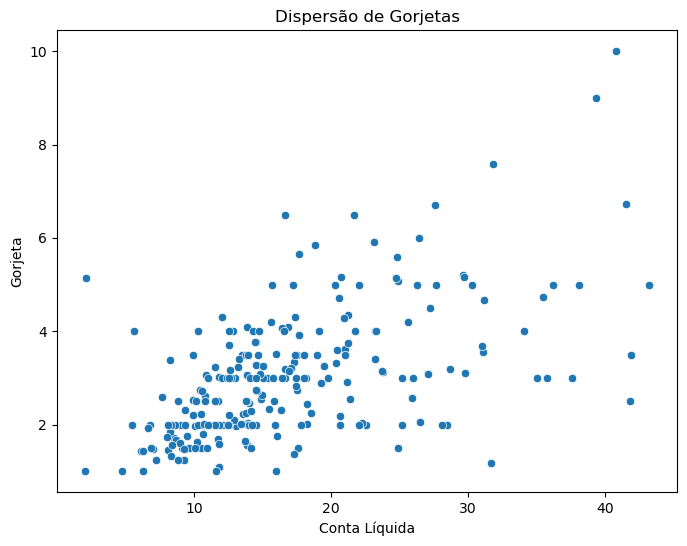

In [25]:
# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title('Dispersão de Gorjetas')
plt.xlabel('Conta Líquida')
plt.ylabel('Gorjeta')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.52e-06
Time:                        18:27:09   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

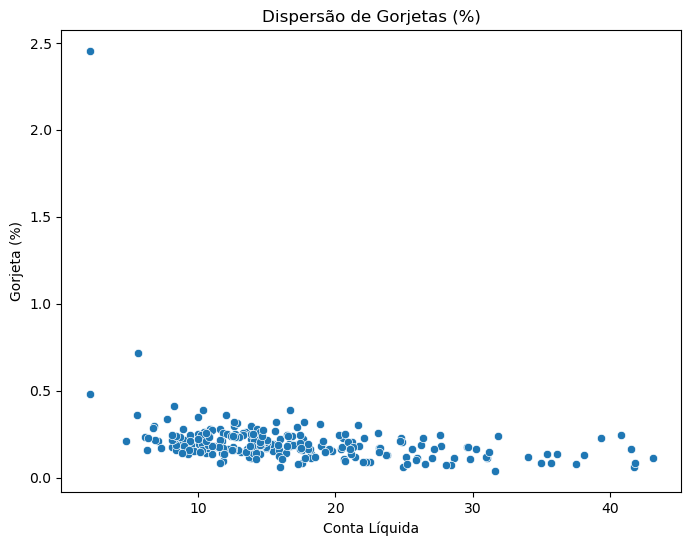

In [27]:
# Regressão linear
reg_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
print(reg_pct.summary())

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title('Dispersão de Gorjetas (%)')
plt.xlabel('Conta Líquida')
plt.ylabel('Gorjeta (%)')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os gráficos que explicitam a relação entre a gorjeta e a conta líquida é mais forte quando consideramos a gorjeta como uma porcentagem da conta líquida. Isso é evidenciado pelo valor de R quadrado mais alto no modelo de regressão de tip_pct por net_bill.

No entanto, não podemos comparar diretamente os doi'ss R quadrad'os, pois eles são calculados com base em diferentes escalas de resposta (gorjeta em dólares vs. gorjeta como porcentagem da conta líquida)

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [29]:
# Valor predito para tip_pct
pred_tip_pct = reg_pct.fittedvalues
print(pred_tip_pct)

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64


In [31]:
# Valor predito para tip
pred_tip = pred_tip_pct * tips['net_bill']
print(pred_tip)

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64


In [33]:
# R quadrado do modelo para tip
r2_tip = 1 - (np.sum((tips['tip'] - pred_tip) ** 2) / np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2))
print('R quadrado do modelo para tip:', r2_tip)

R quadrado do modelo para tip: 0.10889974845461381


O 'R quadrado' do modelo para tip é semelhante ao obtido no item 1, o que é esperado, pois estamos apenas mudando a escala de resposta. Porém, é importante notar que o modelo de regressão de tip_pct por net_bill é mais apropriado para entender a relação entre a gorjeta e a conta líquida, pois considera a porcentagem da conta líquida que é gasta com a gorjeta.